http://fivethirtyeight.com/features/the-battle-for-riddler-nation-round-2/

In [2]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('dark_background')
mpl.rcParams['font.size'] = 14
plt.rc('text', usetex=False)

In [42]:
df = pd.read_csv('castles.csv')
df.head()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,Why did you choose your troop deployment?
0,100,0,0,0,0,0,0,0,0,0,"because, I am number one!"
1,52,2,2,2,2,2,2,12,12,12,I need to win at least 4 castles to win the ga...
2,26,26,26,16,1,1,1,1,1,1,The top 3 are necessary for a majority and the...
3,26,5,5,5,6,7,26,0,0,0,"Most people will focus on high number, but cas..."
4,25,0,0,0,0,0,0,25,25,25,"The total points up for grabs is 55, and to wi..."


In [9]:
matrix = df.as_matrix()[:,0:10].astype(int)

In [14]:
n_players, n_castles = matrix.shape

In [15]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
def win(player1, player2):
    """Return 1 only if p1 wins"""
    score = np.sum(np.sign(player1-player2)*np.arange(1,11))
    if score > 0:
        return 1
    else:
        return 0

In [30]:
wins = np.zeros(n_players, dtype=int)
for p1 in xrange(n_players):
    for p2 in xrange(p1+1, n_players):
        wins[p1] += win(matrix[p1, :], matrix[p2, :])

In [43]:
df['wins'] = wins

In [28]:
n_players

1387L

In [44]:
df = df.sort_values('wins', ascending=False)
df.head()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,Why did you choose your troop deployment?,wins
168,5,7,9,11,15,21,25,2,2,3,Winning the lower 7 gives you more than half t...,1055
150,6,6,6,11,20,21,21,3,3,3,Let people fight for the big ones.,1033
147,6,6,7,11,16,21,26,3,3,1,Since the high value castles I'm intending to ...,1028
136,6,8,11,11,16,21,21,2,2,2,Focus on the mid-valued castles,1006
215,4,8,10,10,15,20,27,2,2,2,Giving up 27 points to hopefully win the remai...,979


In [45]:
df.describe()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,wins
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,2.490267,3.217015,4.175198,6.876712,9.045422,12.935112,15.891132,18.815429,15.541456,10.529200,365.826244
std,4.695383,3.867174,4.569365,6.175635,7.070769,8.577049,9.369232,10.776449,13.173840,14.138349,251.230667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,2.000000,6.000000,11.000000,14.000000,1.000000,0.000000,161.500000
50%,1.000000,2.000000,2.000000,6.000000,9.000000,13.000000,17.000000,20.000000,17.000000,2.000000,319.000000
75%,3.000000,5.000000,6.000000,11.000000,15.000000,20.000000,23.000000,26.000000,26.000000,20.000000,552.500000
max,100.000000,26.000000,32.000000,60.000000,50.000000,100.000000,100.000000,70.000000,100.000000,100.000000,1055.000000


(array([ 112.,  114.,  114.,  138.,   97.,  113.,   91.,   88.,   84.,
          62.,   55.,   71.,   47.,   47.,   56.,   41.,   28.,   18.,
           7.,    4.]),
 array([    0.  ,    52.75,   105.5 ,   158.25,   211.  ,   263.75,
          316.5 ,   369.25,   422.  ,   474.75,   527.5 ,   580.25,
          633.  ,   685.75,   738.5 ,   791.25,   844.  ,   896.75,
          949.5 ,  1002.25,  1055.  ]),
 <a list of 20 Patch objects>)

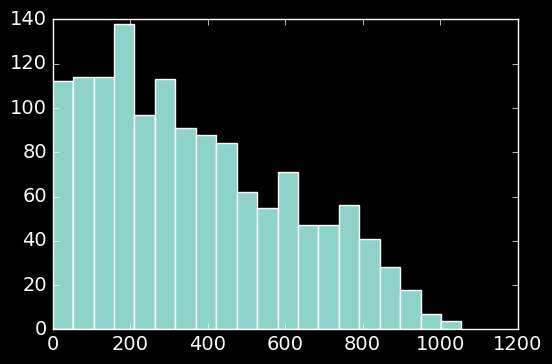

In [49]:
plt.hist(wins, bins=20)